In [1]:
import numpy as np
import pandas as pd

In [6]:
data =pd.read_csv('recipe_site_traffic_2212.csv')

In [7]:
data.head()
data  = data.drop(columns = 'recipe',axis = 1)

In [11]:
data['high_traffic'] = data['high_traffic'].fillna(0)
data['high_traffic'] = data['high_traffic'].replace('High', 1)

In [12]:
data.describe(include = 'number')

,calories,carbohydrate,sugar,protein,high_traffic
count,895.000000,895.000000,895.000000,895.000000,947.000000
mean,435.939196,35.069676,9.046547,24.149296,0.606125
std,453.020997,43.949032,14.679176,36.369739,0.488866
min,0.140000,0.030000,0.010000,0.000000,0.000000
25%,110.430000,8.375000,1.690000,3.195000,0.000000
50%,288.550000,21.480000,4.550000,10.800000,1.000000
75%,597.650000,44.965000,9.800000,30.200000,1.000000
max,3633.160000,530.420000,148.750000,363.360000,1.000000


In [13]:
data.describe(exclude = 'number')

,category,servings
count,947,947
unique,11,6
top,Breakfast,4
freq,106,389


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      947 non-null    object 
 5   servings      947 non-null    object 
 6   high_traffic  947 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 51.9+ KB


In [16]:
#data[data.isna().any(axis = 1)]


In [17]:
data[data['calories'] == data['calories'].max()]

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
925,3633.16,29.07,0.35,2.32,Chicken,4,0


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='calories'>

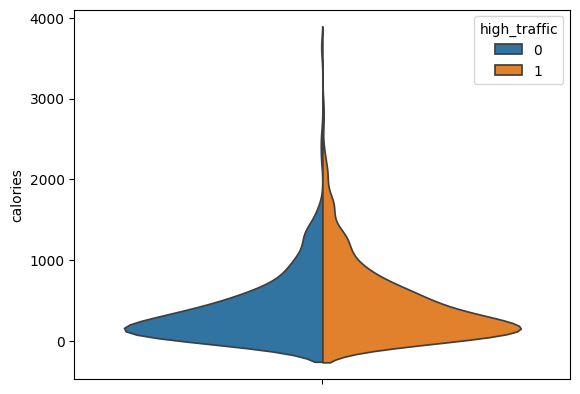

In [24]:
sns.violinplot(data = data, y = 'calories', hue = 'high_traffic', split = 'high_traffic', inner = None)

<Axes: xlabel='calories'>

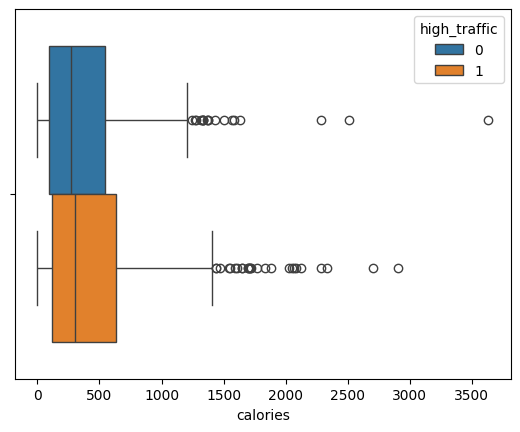

In [27]:
sns.boxplot(data = data, x = 'calories', hue = 'high_traffic')

In [29]:
table = data.groupby('category')['calories'].agg(['mean','median'])

In [30]:
table.head()

,mean,median
category,,
Beverages,177.732174,126.455
Breakfast,331.880000,229.380
Chicken,566.732029,379.870
Chicken Breast,540.338511,371.335
Dessert,351.402078,288.550


<Axes: xlabel='category'>

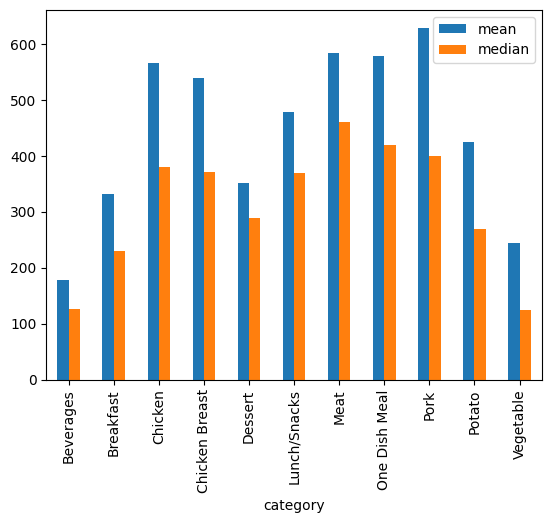

In [34]:
table.plot(kind = 'bar')